Datos sin normalizar: [2, 3, 4, 5, 6, 1, 1, 1, 1, 2, 3, 4, 6, 9]
 Datos normalizados [-0.6154574548966636, -0.18463723646899902, 0.24618298195866556, 0.6770032003863301, 1.1078234188139946, -1.0462776733243282, -1.0462776733243282, -1.0462776733243282, -1.0462776733243282, -0.6154574548966636, -0.18463723646899902, 0.24618298195866556, 1.1078234188139946, 2.400284074096988]
Datos sin normalizar: [2.3, 2.3, 2.3]
 Datos normalizados [2.3, 2.3, 2.3]
Datos sin normalizar: [2.11111, 4, 4, 4, 4, 4, 4, 4, 4, 99, 99, 1, -5, -99]
 Media: 9.222222142857143
 Desvio: 45.016477497452634
 Datos normalizados [-0.15796687209165894, -0.1160069030979302, -0.1160069030979302, -0.1160069030979302, -0.1160069030979302, -0.1160069030979302, -0.1160069030979302, -0.1160069030979302, -0.1160069030979302, 1.9943314725640882, 1.9943314725640882, -0.18264916759252026, -0.3159336965817004, -2.4040579840788556]


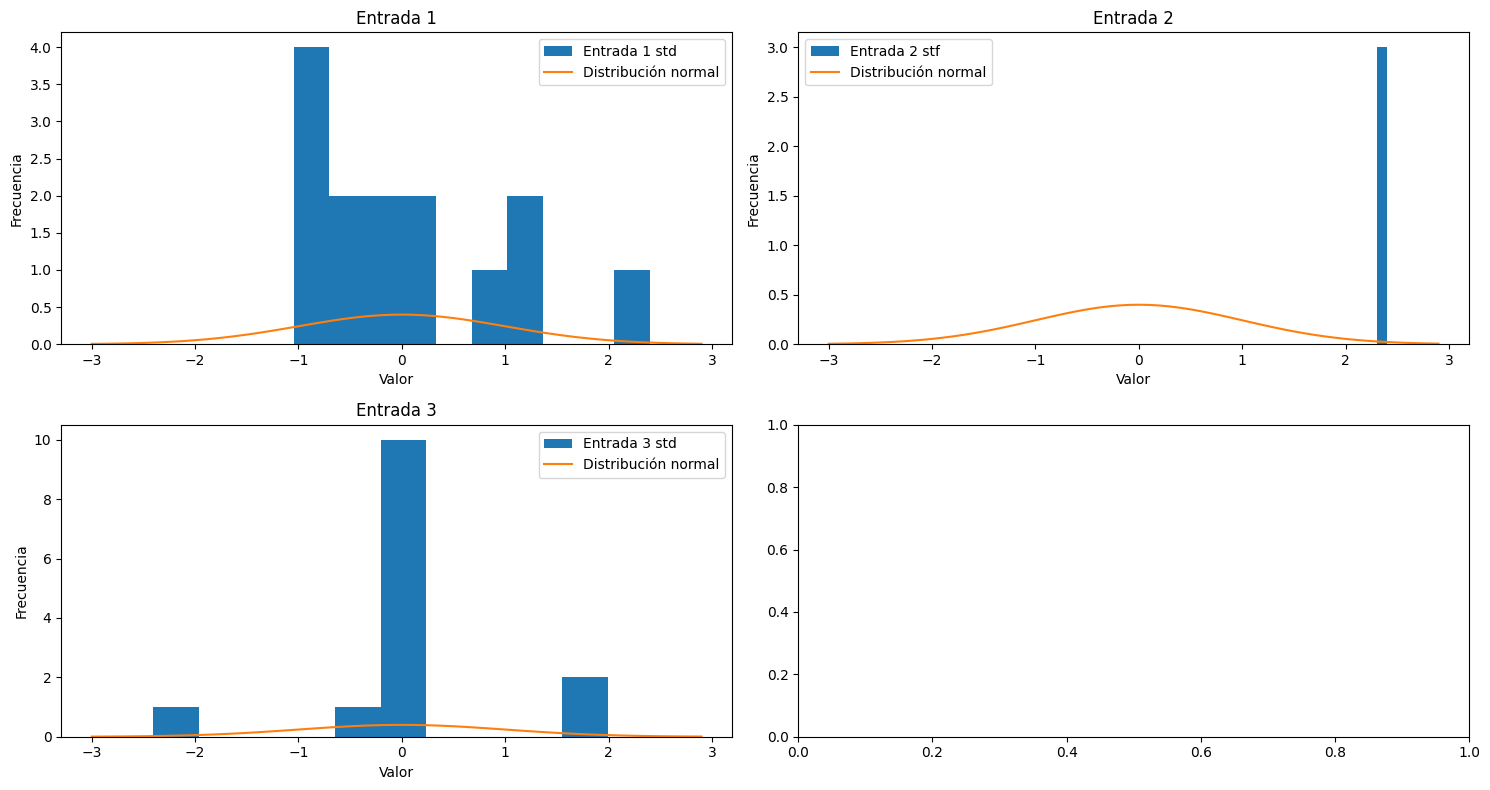

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import math


entrada = [2, 3, 4, 5, 6, 1, 1, 1, 1, 2, 3, 4, 6, 9]
entrada_2 = [2.3, 2.3, 2.3]
entrada_3 = [2.11111, 4, 4, 4, 4, 4, 4, 4, 4, 99, 99, 1, -5, -99]

def calcularMediaMuestral(data):
    return np.mean(data)

def calcularMediana(data):
    return np.median(data)

def calcularMAD(data, mediana):
    mad = sum([(math.abs(x - mediana)) for x in data])/len(data)
    return mad

def calcularDesvio(data, media):
    dif = [(x - media) ** 2 for x in data]
    sumatoria = sum(dif)
    return math.sqrt(sumatoria / len(data))

def estandarizarDatosMedia(data, desvio, media):
    if desvio == 0:
        return data
    return [(x - media)/ desvio for x in data]

def estandarizarDatosMediana(data,mad, mediana):
    if mad == 0:
        return data
    return [(x - mediana) / mad for x in data]

media_entrada = calcularMediaMuestral(entrada)
desvio_entrada = calcularDesvio(entrada, media_entrada)
datos_std = estandarizarDatosMedia(entrada,desvio_entrada,media_entrada)
print(f"Datos sin normalizar: {entrada}\n Datos normalizados {datos_std}")

media_entrada_2 = calcularMediaMuestral(entrada_2)
desvio_entrada_2 = calcularDesvio(entrada_2, media_entrada_2)
datos_std_2 = estandarizarDatosMedia(entrada_2,desvio_entrada_2,media_entrada_2)
print(f"Datos sin normalizar: {entrada_2}\n Datos normalizados {datos_std_2}")

media_entrada_3 = calcularMediaMuestral(entrada_3)
desvio_entrada_3 = calcularDesvio(entrada_3, media_entrada_3)
datos_std_3 = estandarizarDatosMedia(entrada_3,desvio_entrada_3,media_entrada_3)
print(f"Datos sin normalizar: {entrada_3}\n Media: {media_entrada_3}\n Desvio: {desvio_entrada_3}\n Datos normalizados {datos_std_3}")


"""2) Para el caso de la media en la entrada 3, la media resulta como valor no representativo, ya que
los datos fluctuan mucho. Por lo que es recomendable usar la mediana antes que la media como valor representativo."""



# Generar datos para una distribución normal
datos_normal = np.random.normal(loc=0, scale=1, size=10)


# Parámetros de la distribución normal
mu = 0
sigma = 1

# Generar datos aleatorios
datos_normal = np.random.normal(mu, sigma, 1000)

# Calcular la densidad de probabilidad teórica
x = np.arange(mu - 3 * sigma, mu + 3 * sigma, 0.1)
densidad_probabilidad = stats.norm.pdf(x, mu, sigma)

# Crear la figura y subplots
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))  # Ajustar el tamaño de la figura

#Nombres de graficos
graficos = ["Entrada 1 std", "Entrada 2 stf", "Entrada 3 std"]

# Graficar el histograma y la distribución normal teórica en cada subplot
for i, datos in enumerate([datos_std, datos_std_2, datos_std_3]):
    # Obtener el subplot actual
    ax = axes.flat[i]

    # Graficar el histograma
    ax.hist(datos, density=False, label=f"{graficos[i]}")

    # Graficar la distribución normal teórica
    ax.plot(x, densidad_probabilidad, label="Distribución normal")

    # Agregar título y leyenda
    ax.set_title(f"Entrada {i+1}")
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frecuencia")
    ax.legend()

# Ajustar el espacio entre subplots
plt.tight_layout()

plt.show()


In [4]:
import pandas as pd
from google.colab import drive

##Ejercicio 2
""""
1)
Variables Nominales: Representan categorias o etiquetas sin un orden.
Ejemplo: Liverpool, Arsenal, Wolves (Equipo local o visitante)

Variables Ordinales: Representan un orden o jerarquia especifica.
Puede Ordenar los valores en una secuencia significativa.
Para identificar las variables ordinales, tenes que ver si cada
opcion dentro de los datos tiene un peso sobre las otras posibilidades
Ejemplo: Seria A > Serie B > Serie C (Division)
"""


file = pd.read_csv('past-data.csv')

#Generamos un mapa con las season
season_map = {
    '22-23':0,
    '21-22':1,
    '20-21':2,
    '19-20':3,
    '18-19':4,
    '17-18':5,
    '16-17':6,
    '15-16':7,
    '14-15':8,
    '13-14':9,
    '12-13':10,
    '11-12':11,
    '10-11':12,
    '09-10':13,
    '08-09':14,
    '07-08':15,
    '06-07':16,
    '05-06':17,
    '04-05':18,
    '03-04':19,
    '02-03':20,
    '01-02':21,
    '00-01':22,
    '99-00':23,
    '98-99':24,
    '97-98':25,
    '96-97':26,
    '95-96':27,
    '94-95':28,
    '93-94':29,
}

#Obtenemos todas las season del dataset
ligas = file['Season'].unique()

#Las remplazamos en la columna original
file['Season'] = file['Season'].map(season_map)

div_map = {
    'Serie A': 0,
    'Premier League': 1,
    'LaLiga': 2 ,
    'Bundesliga': 3,
    'Ligue 1': 4,
    'Serie B': 5,
    'EFL Championship': 6,
    'LaLiga 2': 7,
    'Bundesliga 2': 8,
    'Ligue 2': 9,
}

file['Div'] = file['Div'].map(div_map)


#Usamos get_dummies para generar las variables dummy para Resultados
dummies = pd.get_dummies(file['FTR'], drop_first=False)
#Agregamos las nuevas columnas al dataframe
file = file.join(dummies)

df_home = pd.get_dummies(file['HomeTeam'], prefix='Home')
df_away = pd.get_dummies(file['AwayTeam'], prefix='Away')
file = pd.concat([file, df_home, df_away], axis=1)
file = file.drop(columns=['HomeTeam', 'AwayTeam'])


print(file.info())

"""
2)
Ordinales:
- Temporada
- Division
- Fecha
- Hora

Nominales:
- Equipo local
- Equipo visitante
- Arbitro
- Resultado medio tiempo (L,V,E)
- Resultado completo (L,V,E)

Ordinales

Temporada:
1 = 93 - 94
2 = 94 - 95
3 = 95 - 96
.
.
.
27 = 22 - 23

Division (segun iffhs https://iffhs.com/posts/3336):
Serie A = 0
Premier league = 1
La liga = 2
Bundesliga = 3
Ligue 1 = 4
Serie B = 5
Championship = 6
La liga 2 = 7
Bundesliga 2 = 8
Ligue 2 = 9

Nominales

Resultado (medio tiempo y completo):
Local = (0 | 1)
Visitante = (0 | 1)
Empate = (0 | 1)
Resultado = (Local = 0, Visitante = 0, Empate = 1) (empate)
Resultado = (1,0,0)


Ordinales:
- Temporada
- Division
- Fecha
- Hora

Nominales:
- Equipo local
- Equipo visitante
- Arbitro
- Resultado medio tiempo (L,V,E)
- Resultado completo (L,V,E)
"""

ModuleNotFoundError: No module named 'pandas'

<ipython-input-4-b37f5596549f>:20: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  file= pd.read_csv(ruta_archivo)


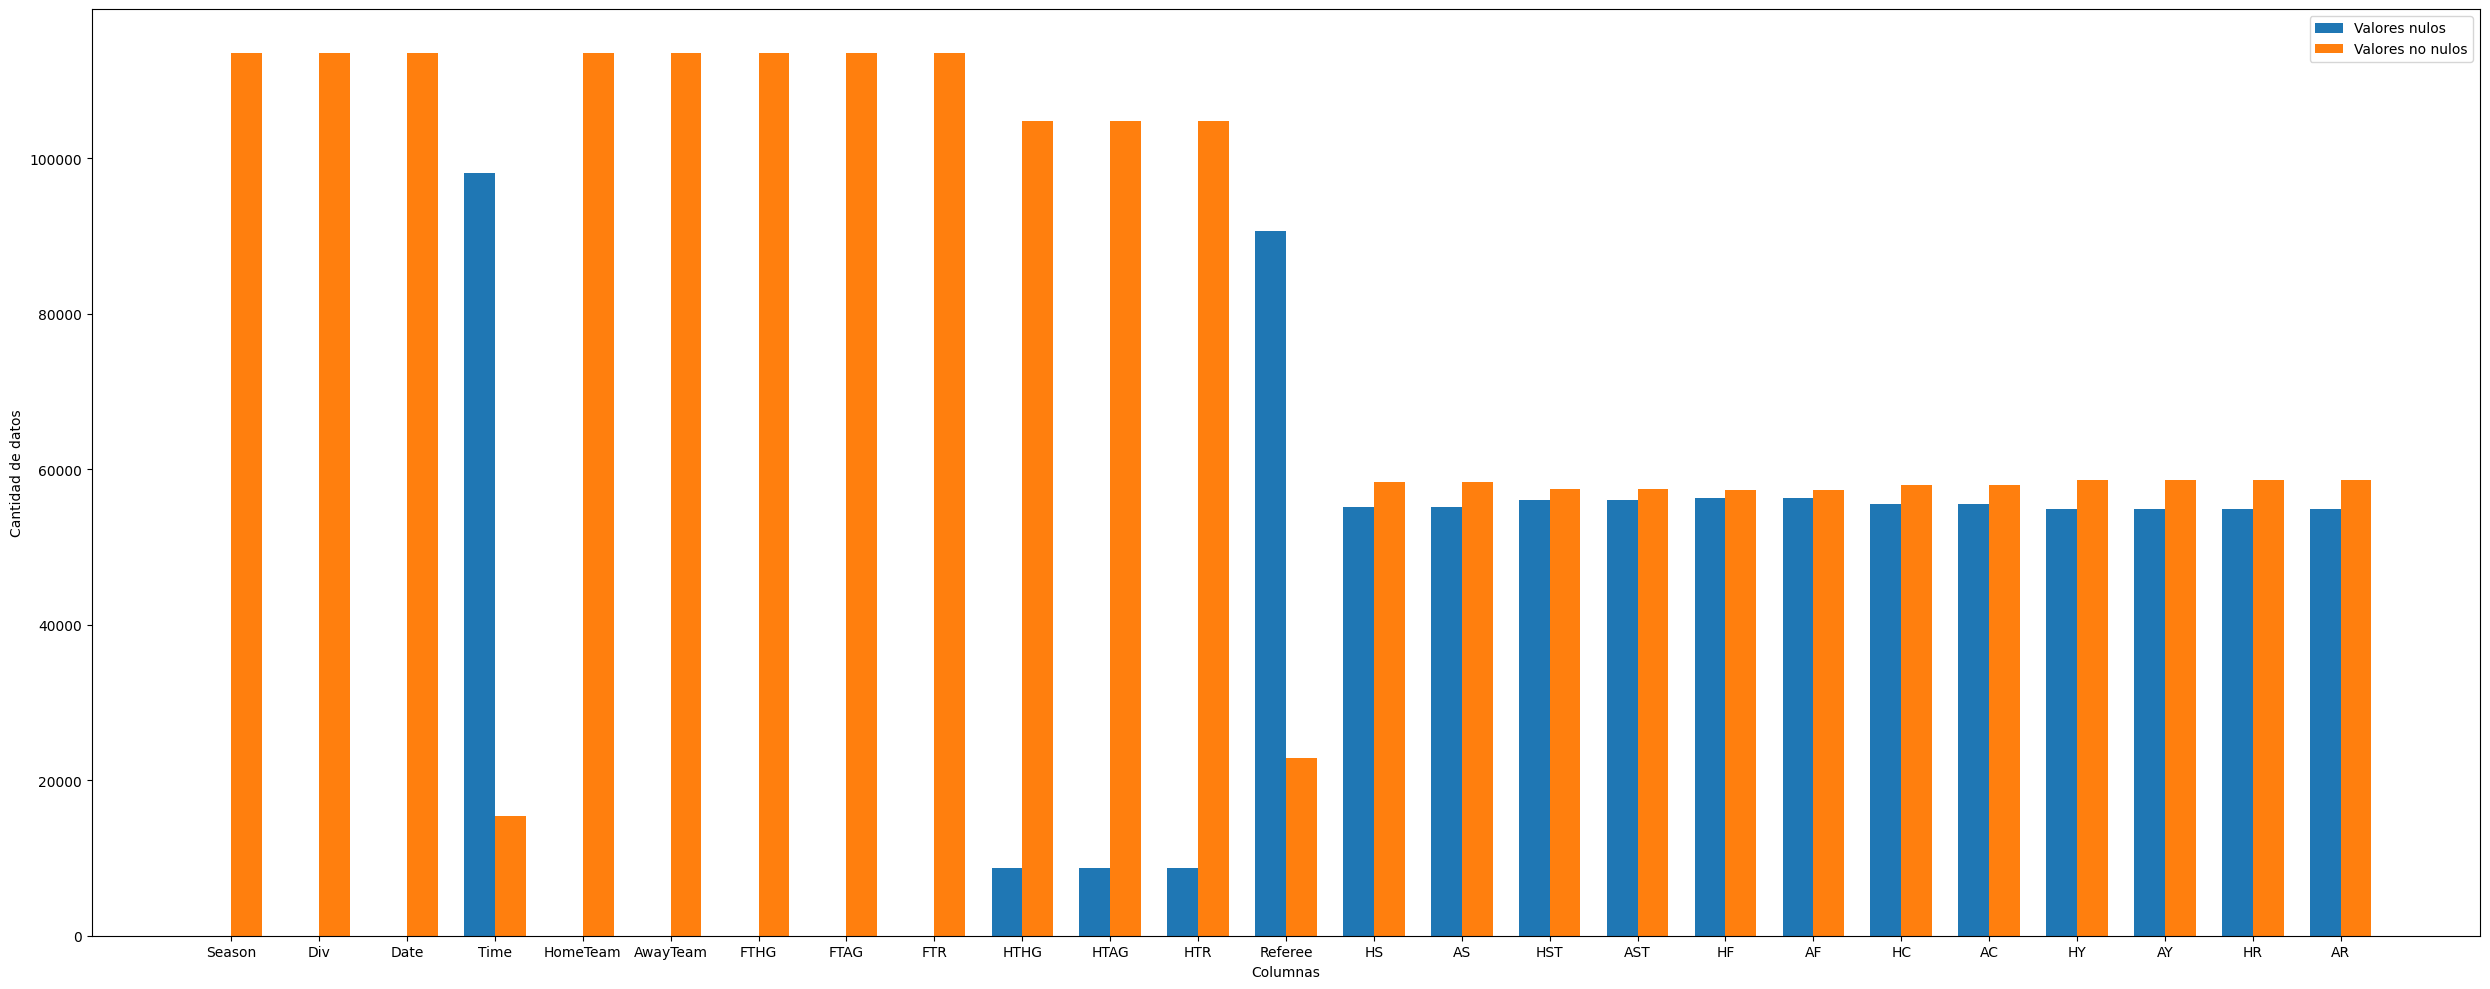

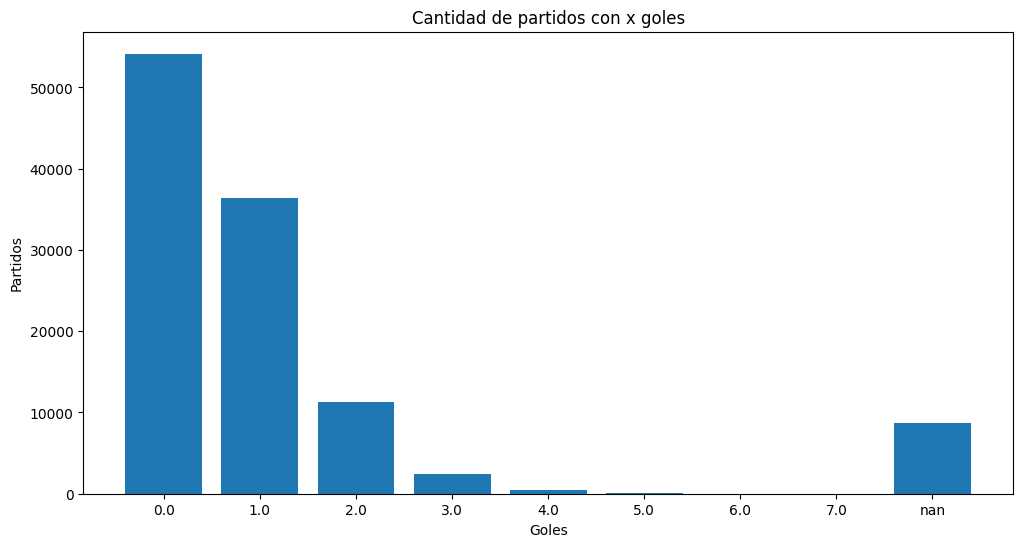

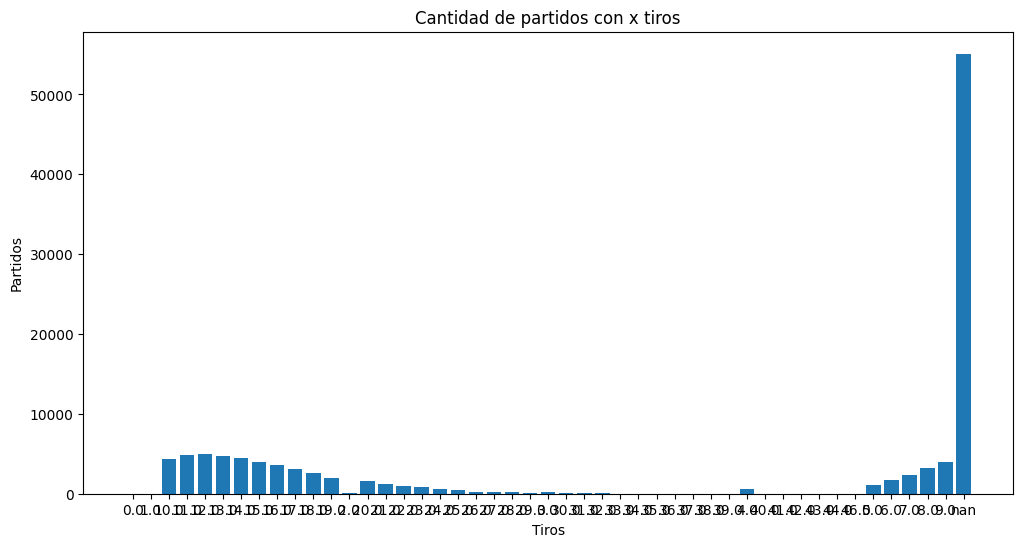

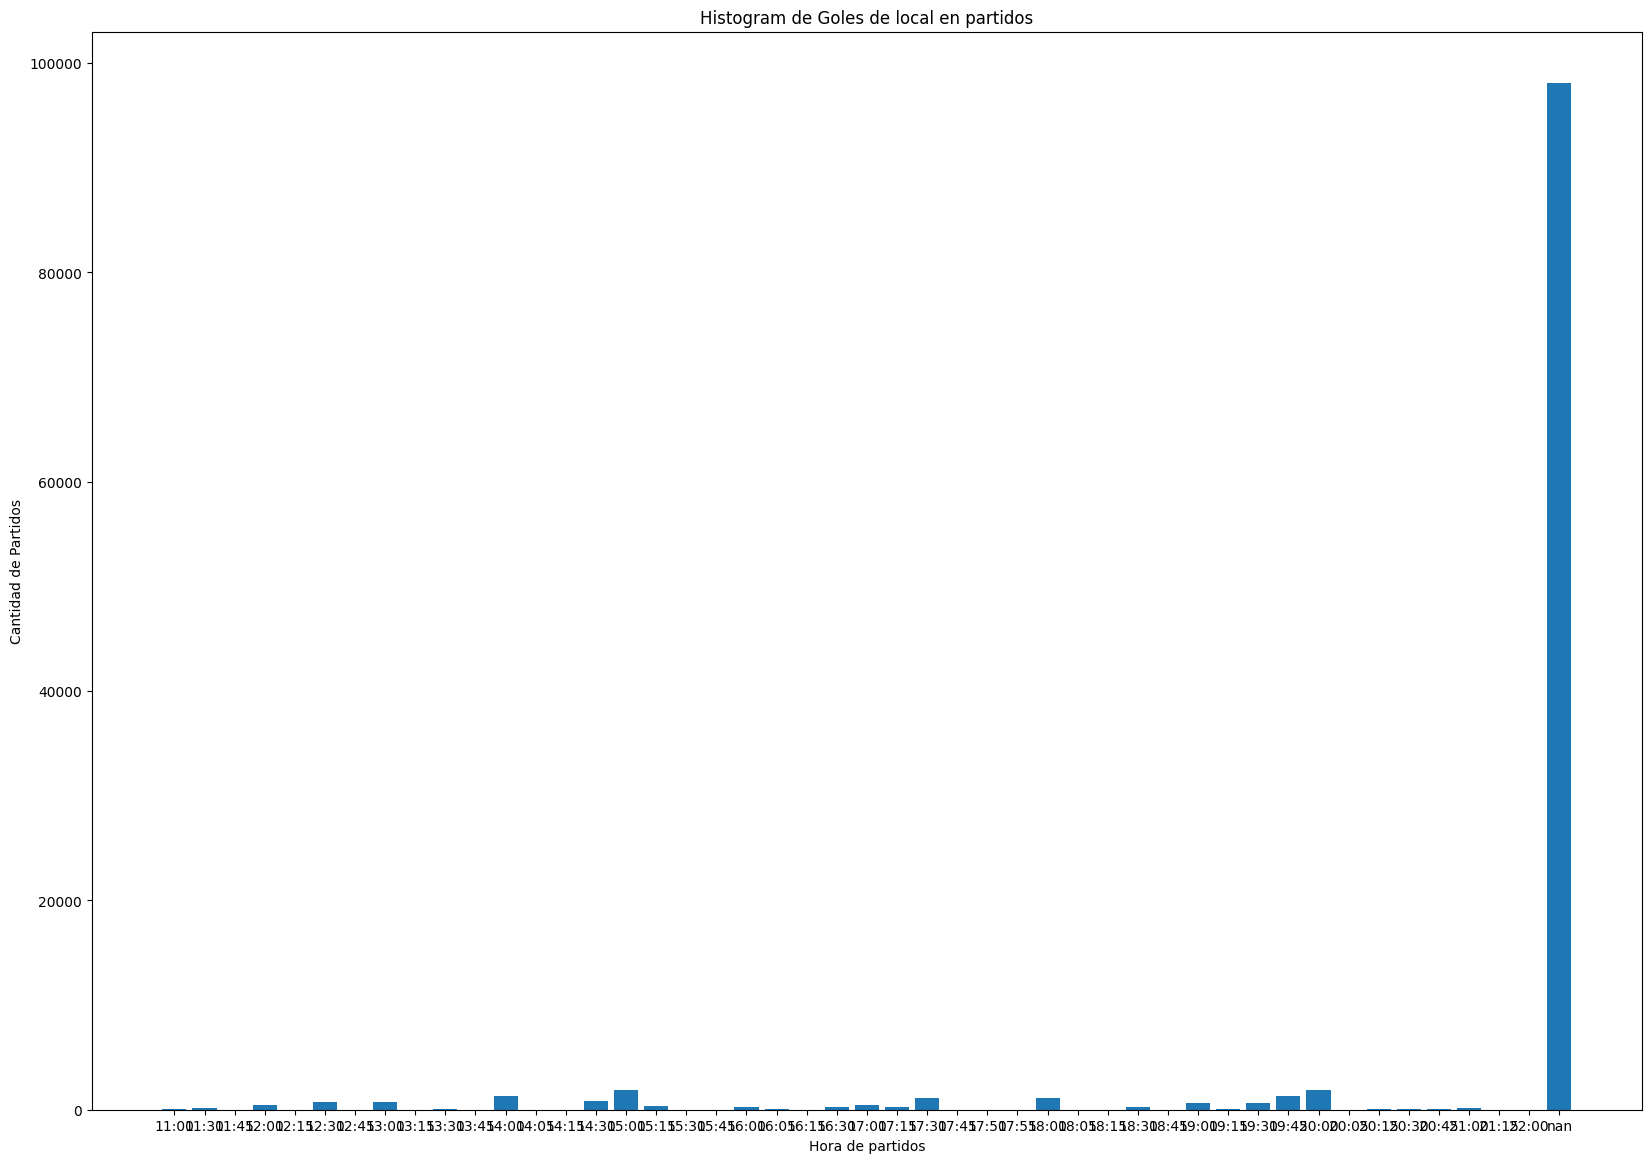

Season          0
Div             0
Date            0
Time            0
HomeTeam        0
AwayTeam        0
FTHG            0
FTAG            0
FTR             0
HTHG            0
HTAG            1
HTR             0
HS              0
AS          46389
HST         47307
AST         47307
HF          47527
AF          47527
HC          46764
AC          46764
HY          46212
AY          46211
HR          46211
AR          46211
dtype: int64


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

"""
Ejercicio 3

Columnas Categoricas: Tiempo
Columnas Numerica: Cantidad de goles por equipo local (HTHG)

Eliminar Columna: Referee

Eliminar Filas: HTHG (Como no tiene muchos valore nulos, imputamos por la mediana)

Imputar Filas: Tiros de local (HS), Tiempo

"""

file= pd.read_csv('past-data.csv')

# Contar los valores nulos y no nulos por columna
null_counts = file.isnull().sum()
non_null_counts = file.notna().sum()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(25, 10))

# Crear dos barras para cada columna, una para valores nulos y otra para no nulos
index = np.arange(len(file.columns))
bar_width = 0.35

rects1 = ax.bar(index - bar_width/2, null_counts, bar_width, label='Valores nulos')
rects2 = ax.bar(index + bar_width/2, non_null_counts, bar_width, label='Valores no nulos')

# Personalizar el gráfico
ax.set_xlabel('Columnas')
ax.set_ylabel('Cantidad de datos')
ax.set_xticks(index)
ax.set_xticklabels(file.columns)
ax.legend()

plt.tight_layout()
plt.show()


def graficarConNulos(columna, xlab, ylab, title):
    valores = columna.value_counts(dropna=False)
    indices = valores.index.astype(str)

    mapeo = dict(zip(indices, valores.values))
    sorted_mapeo_keys = sorted(mapeo.keys())
    sorted_mapeo = dict((key, mapeo[key]) for key in sorted_mapeo_keys)

    indices_sorted = list(sorted_mapeo.keys())
    valores_sorted = list(sorted_mapeo.values())


    # Alternatively, consider a single histogram with color-coding:
    plt.figure(figsize=(12, 6))  # Create a larger figure
    plt.bar(indices_sorted, valores_sorted)  # Use value as color
    plt.xlabel(f"{xlab}")
    plt.ylabel(f"{ylab}")
    plt.title(f"{title}")
    plt.show()


#Elejimos 2 columnas, FTHG y HS
# Selección de las columnas FTHG y HS
goles_local = file['HTHG']
tiros_local = file['HS']

graficarConNulos(goles_local, "Goles", "Partidos", "Cantidad de partidos con x goles")
graficarConNulos(tiros_local, "Tiros", "Partidos", "Cantidad de partidos con x tiros")



horas = file['Time']

valores_tiempo = horas.value_counts(dropna = False)
indices_tiempo = valores_tiempo.index.astype(str)


mapeo_hora = dict(zip(indices_tiempo, valores_tiempo.values))

sorted_mapeo_keys_hora = sorted(mapeo_hora.keys())
sorted_mapeo_tiempo = dict((key, mapeo_hora[key]) for key in sorted_mapeo_keys_hora)

nuevo_mapeo = {}

valores_tiempo_sorted = list(sorted_mapeo_tiempo.values())
indices_tiempo_sorted = list(sorted_mapeo_tiempo.keys())

plt.figure(figsize=(20, 14))  # Create a larger figure
plt.bar(indices_tiempo_sorted, valores_tiempo_sorted)  # Use value as color
plt.xlabel("Hora de partidos")
plt.ylabel("Cantidad de Partidos")
plt.title("Histogram de Goles de local en partidos")
plt.show()



# Eliminamos columna "Referee"
file = file.drop(columns='Referee')

# Eliminamos filas con nulos en "HTAG", "HTHG", "HTR"
file = file.dropna(axis=0,how='any',subset=['HTHG'])

# Imputamos las columnas HS y Tiempo
file['HS'].fillna(file['HS'].mean(), inplace=True)


file['Time'].fillna(file['Time'].mode()[0], inplace=True)

print(file.isnull().sum())



<ipython-input-9-141dde93a463>:9: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo)


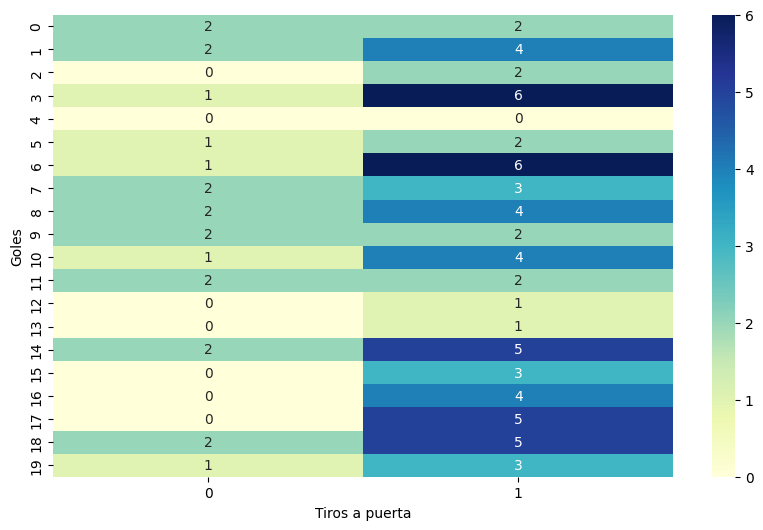

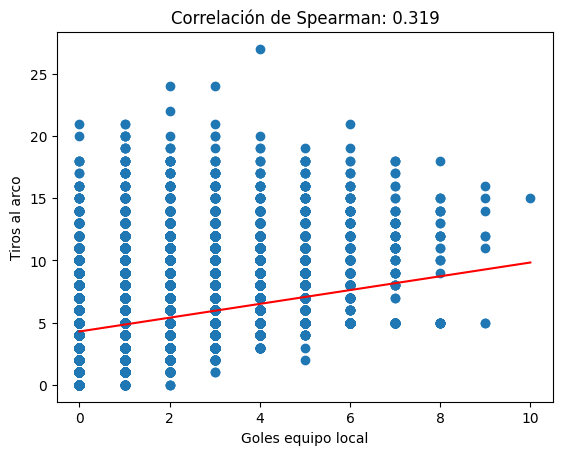

SignificanceResult(statistic=0.15015925176923905, pvalue=0.0)
SignificanceResult(statistic=-0.011742803842417899, pvalue=7.606881931768288e-05)
SignificanceResult(statistic=0.17402636005750635, pvalue=0.0)
SignificanceResult(statistic=0.009284094108633767, pvalue=0.0017599121149716138)


In [ ]:
##Ejercicio 4 (masomenos)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from google.colab import drive

df = pd.read_csv('past-data.csv')

# Cálculo de medianas
mediana_goles_h = df['FTHG'].median()
mediana_goles_a = df['FTAG'].median()
mediana_tiros_h = df['HS'].median()
mediana_tiros_a = df['AS'].median()
mediana_tiros_puerta_h = df['HST'].median()
mediana_tiros_puerta_a = df['AST'].median()
mediana_corners_h = df['HC'].median()
mediana_corners_a = df['AC'].median()

# Rellenar valores NaN
goles_local = df['FTHG'].fillna(mediana_goles_h)
goles_visitante = df['FTAG'].fillna(mediana_goles_a)
tiros_local = df['HS'].fillna(mediana_tiros_h)
tiros_visitante = df['AS'].fillna(mediana_tiros_a)
tiros_puerta_local = df['HST'].fillna(mediana_tiros_puerta_h)
tiros_puerta_visitante = df['AST'].fillna(mediana_tiros_puerta_a)
corner_local = df['HC'].fillna(mediana_corners_h)
corner_visitante = df['AC'].fillna(mediana_corners_a)

def graficar_heatmap(goles_visitante, tiros_puerta_visitante):
  # Se seleccionan los primeros 20 datos
  goles_visitante = goles_visitante[:20]
  tiros_puerta_visitante = tiros_puerta_visitante[:20]

  # Se crea la matriz de datos
  datos = np.array([goles_visitante, tiros_puerta_visitante]).T

  # Se crea el heatmap
  plt.figure(figsize=(10, 6))
  sns.heatmap(datos, annot=True, cmap="YlGnBu")

  # Se agregan etiquetas a los ejes
  plt.xlabel("Tiros a puerta")
  plt.ylabel("Goles")

  # Se muestra el heatmap
  plt.show()

# Heatmap
graficar_heatmap(goles_visitante,tiros_puerta_visitante)

# Función para calcular la correlación de Spearman
def correlacion_spearman(dato1, dato2):
  return stats.spearmanr(dato1, dato2)

def graficar_dispercion(dato1, dato2):
  # Calcular el coeficiente de correlación de Spearman
  coef_correlacion, _ = stats.spearmanr(dato1, dato2)

  # Generar el diagrama de dispersión
  plt.scatter(dato1, dato2)

  # Ajustar la línea de regresión de Spearman
  linea_regresion = stats.linregress(dato1, dato2)
  x_regresion = np.linspace(min(dato1), max(dato1), 100)
  y_regresion = linea_regresion.slope * x_regresion + linea_regresion.intercept

  # Agregar la línea de regresión al diagrama
  plt.plot(x_regresion, y_regresion, color='r')

  # Añadir etiquetas y título
  plt.xlabel('Goles equipo local')
  plt.ylabel('Tiros al arco')
  plt.title('Correlación de Spearman: {:.3f}'.format(coef_correlacion))

  # Mostrar el diagrama
  plt.show()

# Gráfico de dispersión
graficar_dispercion(goles_local,tiros_puerta_local)


# Cálculo y visualización de la correlación de Spearman
print(correlacion_spearman(goles_local,tiros_local))
print(correlacion_spearman(goles_local,corner_local))
print(correlacion_spearman(goles_visitante,tiros_visitante))
print(correlacion_spearman(goles_visitante,corner_visitante))